---
author: Vincent Nijs
format:
    html:
        code-tools: true
        code-fold: true
        toc: true
        embed-resources: true
        highlight: "zenburn"
        theme: "cosmo"
        includes:
            in_header: figures/icon-header.html
---

YAML header for use with Quarto

# Basics > Proportions > Compare Proportions


<div class="alert alert-info">Compare proportions for two or more groups in the data</div>

The compare proportions test is used to evaluate if the frequency of occurrence of some event, behavior, intention, etc. differs across groups. The null hypothesis for the difference in proportions across groups in the population is set to zero. We test this hypothesis using sample data.

We can perform either a one-tailed test (i.e., `less` or `greater`) or a two-tailed test (`two-sided`). A one-tailed test is useful if we want to evaluate if the available sample data suggest that, for example, the proportion of dropped calls is larger (or smaller) for one wireless service provider compared to others.

In [1]:
import matplotlib as mpl
import pyrsm as rsm

# increase plot resolution
mpl.rcParams["figure.dpi"] = 100


In [2]:
## setup pyrsm for autoreload
%reload_ext autoreload
%autoreload 2
%aimport pyrsm

# Example

We will use a sample from a dataset that describes the survival status of individual passengers on the Titanic. The principal source for data about Titanic passengers is the Encyclopedia Titanic. One of the original sources is Eaton & Haas (1994) Titanic: Triumph and Tragedy, Patrick Stephens Ltd, which includes a passenger list created by many researchers and edited by Michael A. Findlay.

In [3]:
titanic, titanic_description = rsm.load_data(pkg="data", name="titanic")
titanic


,pclass,survived,sex,age,sibsp,parch,fare,name,cabin,embarked
0,1st,Yes,female,29.0000,0,0,211.337494,"Allen, Miss. Elisabeth Walton",B5,Southampton
1,1st,Yes,male,0.9167,1,2,151.550003,"Allison, Master. Hudson Trevor",C22 C26,Southampton
2,1st,No,female,2.0000,1,2,151.550003,"Allison, Miss. Helen Loraine",C22 C26,Southampton
3,1st,No,male,30.0000,1,2,151.550003,"Allison, Mr. Hudson Joshua Crei",C22 C26,Southampton
4,1st,No,female,25.0000,1,2,151.550003,"Allison, Mrs. Hudson J C (Bessi",C22 C26,Southampton
...,...,...,...,...,...,...,...,...,...,...
1038,3rd,No,male,45.5000,0,0,7.225000,"Youseff, Mr. Gerious",,Cherbourg
1039,3rd,No,female,14.5000,1,0,14.454200,"Zabour, Miss. Hileni",,Cherbourg
1040,3rd,No,male,26.5000,0,0,7.225000,"Zakarian, Mr. Mapriededer",,Cherbourg
1041,3rd,No,male,27.0000,0,0,7.225000,"Zakarian, Mr. Ortin",,Cherbourg


In [4]:
# format the data description
rsm.md(titanic_description)


## Titanic

This dataset describes the survival status of individual passengers on the Titanic. The titanic data frame does not contain information from the crew, but it does contain actual ages of (some of) the passengers. The principal source for data about Titanic passengers is the Encyclopedia Titanica. One of the original sources is Eaton & Haas (1994) Titanic: Triumph and Tragedy, Patrick Stephens Ltd, which includes a passenger list created by many researchers and edited by Michael A. Findlay.

## Variables

* survival - Survival (Yes, No)
* pclass - Passenger Class (1st, 2nd, 3rd)
* sex - Sex (female, male)
* age - Age in years
* sibsp - Number of Siblings/Spouses Aboard
* parch - Number of Parents/Children Aboard
* fare - Passenger Fare
* name - Name
* cabin - Cabin
* embarked - Port of Embarkation (Cherbourg, Queenstown, Southampton)

##  Notes

`pclass` is a proxy for socio-economic status (SES) 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1). If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch) some relations were ignored.  The following are the definitions used for sibsp and parch.

Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
Parent:   Mother or Father of Passenger Aboard Titanic
Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins, nephews/nieces, aunts/uncles, and in-laws. Some children travelled only with a nanny, therefore parch=0 for them.  As well, some travelled with very close friends or neighbors in a village, however, the definitions do not support such relations.

Note: Missing values and the `ticket` variable were removed from the data

## Related reading

<a href="http://phys.org/news/2012-07-shipwrecks-men-survive.html" target="_blank">In shipwrecks, men more likely to survive</a>

Lets focus on two variables in the database:
- survived = a factor with levels `Yes` and `No`
- pclass = Passenger Class (1st, 2nd, 3rd). This is a proxy for socio-economic status (SES) 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Suppose we want to test if the proportion of people that survived the sinking of the Titanic differs across passenger classes. To test this hypothesis we specify `pclass` as the grouping variable (`var2`) and calculate proportions of `yes` (`lev`) for the `survived` variable (`var2`).

If there are specific combinations we want to test we can specify a list of level combinations (e.g., `comb = ["1st:2nd", "2nd:3rd"]`). If `comb` arugment is ommitted all available pair-wise comparisons across the three passenger class levels will be evaluated. Unless we have an explicit hypothesis for the direction of the effect, we should use a two-sided test (i.e., `two-sided`). Our first alternative hypothesis would be 'The proportion of survivors among 1st class passengers was different compared to 2nd class passengers'.

In [5]:
cp = rsm.basics.compare_props(
    {"titanic": titanic},
    var1="pclass",
    var2="survived",
    lev="Yes",
    conf=0.95,
)
cp.summary()

Pairwise proportion comparisons
Data      : titanic
Variables : pclass, survived
Level     : "Yes" in survived
Confidence: 0.95
Adjustment: None

pclass  Yes     p   n  n_missing    sd    se    me
   1st  179 0.635 282          0 0.481 0.029 0.056
   2nd  115 0.441 261          0 0.496 0.031 0.060
   3rd  131 0.262 500          0 0.440 0.020 0.039 

Null hyp.            Alt. hyp.  diff p.value    
1st = 2nd 1st not equal to 2nd 0.194  < .001 ***
1st = 3rd 1st not equal to 3rd 0.373  < .001 ***
2nd = 3rd 2nd not equal to 3rd 0.179  < .001 ***

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


The first two blocks of output show basic information about the test (e.g.,. selected variables and confidence levels) and summary statistics (e.g., proportions, standard error, margin or error, etc. per group). The final block of output shows the following:

- `Null hyp.` is the null hypothesis and `Alt. hyp.` the alternative hypothesis
- `diff` is the difference between the sample proportion for two groups (e.g., 0.635 - 0.441 = 0.194). If the null hypothesis is true we expect this difference to be small (i.e., close to zero)
- `p.value` is the probability of finding a value as extreme or more extreme than `diff` if the null hypothesis is true

If we check `Show additional statistics` the following output is added:

In [6]:
cp.summary(extra=True)

Pairwise proportion comparisons
Data      : titanic
Variables : pclass, survived
Level     : "Yes" in survived
Confidence: 0.95
Adjustment: None

pclass  Yes     p   n  n_missing    sd    se    me
   1st  179 0.635 282          0 0.481 0.029 0.056
   2nd  115 0.441 261          0 0.496 0.031 0.060
   3rd  131 0.262 500          0 0.440 0.020 0.039 

Null hyp.            Alt. hyp.  diff p.value  chisq.value  df  2.5%  97.5%    
1st = 2nd 1st not equal to 2nd 0.194  < .001       20.576   1 0.112  0.277 ***
1st = 3rd 1st not equal to 3rd 0.373  < .001      104.704   1 0.305  0.441 ***
2nd = 3rd 2nd not equal to 3rd 0.179  < .001       25.008   1 0.107  0.250 ***

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


- `chisq.value` is the chi-squared statistic associated with `diff` that we can compare to a chi-squared distribution. For additional discussion on how this metric is calculated see the help file in Basics > Tables > Cross-tabs. For each combination the equivalent of a 2X2 cross-tab is calculated.
- `df` is the degrees of freedom associated with each statistical test (1).
- `2.5%` `97.5%` show the 95% confidence interval around the difference in sample proportions. These numbers provide a range within which the true population difference is likely to fall

In [7]:
# the same analysis will also work if we provide a polars dataframe
# import polars as pl
# cp = rsm.basics.compare_props(
#     {"titanic": pl.DataFrame(titanic)},
#     var1="pclass",
#     var2="survived",
#     lev="Yes",
#     conf=0.95,
# )
# cp.summary()

# Testing

There are three approaches we can use to evaluate the null hypothesis. We will choose a significance level of 0.05.<sup>1</sup> Of course, each approach will lead to the same conclusion.

### p.value

Because the p.values are **smaller** than the significance level for each pair-wise comparison we can reject the null hypothesis that the proportions are equal based on the available sample of data. The results suggest that 1st class passengers were more likely to survive the sinking than either 2nd or 3rd class passengers. In turn, the 2nd class passengers were more likely to survive than those in 3rd class.

### Confidence interval

Because zero is **not** contained in any of the confidence intervals we reject the null hypothesis for each evaluated combination of passenger class levels.

### Chi-squared values

Because the calculated chi-squared values (20.576, 104.704, and 25.008) are **larger** than the corresponding **critical** chi-squared value we reject the null hypothesis for each evaluated combination of passenger class levels. We can obtain the critical chi-squared value by using the probability calculator in the ***Basics*** menu. Using the test for 1st versus 2nd class passengers as an example, we find that for a chi-squared distribution with 1 degree of freedom (see `df`) and a confidence level of 0.95 the critical chi-squared value is 3.841.

Probability calculator
Distribution: Chi-square
Df          : 1
Mean        : 1
Variance    : 2
Lower bound : 0
Upper bound : 0.95

P(X < 3.841) = 0.95
P(X > 3.841) = 0.05


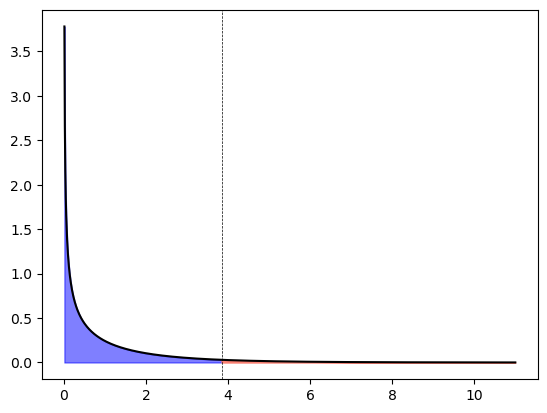

In [8]:
pc = rsm.basics.prob_calc("chisq", df=1, pub=0.95)
pc.summary()
pc.plot()

In addition to the numerical output shown above we can also investigate the association between `pclass` and `survived` visually. The first chart has standard error bars for the proportion of `yes` entries for `survived` in the sample. Consistent with the summary results shown above there are clear differences in the survival rate across passenger classes. The `Dodge` chart shows the proportions of `yes` and `no` in `survived` side-by-side for each passenger class. While 1st class passengers had a higher proportion of `yes` than `no` the opposite seems to hold for the 3rd class passengers.

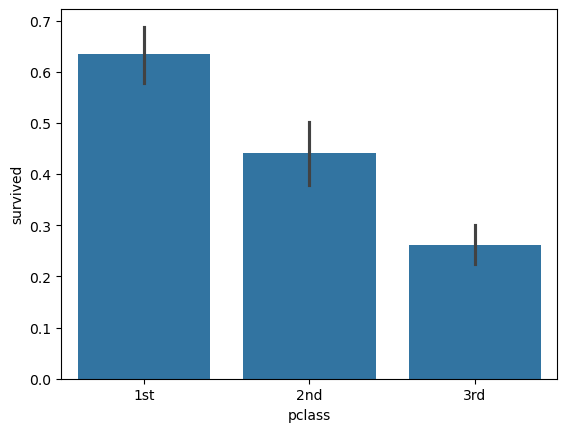

In [19]:
cp.plot()

/Users/vnijs/gh/pyrsm/pyrsm/basics/compare_props.py:202: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  import matplotlib.pyplot as plt


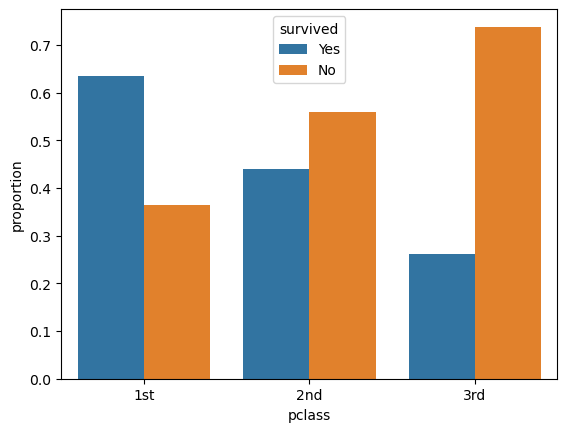

In [20]:
cp.plot(plots="dodge")

# Technical Notes
- Compare Proportions in Radiant-for-Python is set up to produce the same results provided by Radiant-for-R. Radiant-for-R uses the `prop.test` function and the confidence intervals are calculated using the Wald's method.
- For one-sided tests (i.e., `Less than` or `Greater than`) critical values can be obtained by using the normal distribution in the probability calculator and squaring the corresponding Z-statistic.

# Multiple comparison adjustment

The more comparisons we evaluate, the more likely we are to find a “significant” result just by chance even if the null hypothesis is true. If we conduct 100 tests and set our **significance level** at 0.05 (or 5%) we can expect to find 5 p.values smaller than or equal to 0.05 even if there are no associations in the population.

Bonferroni adjustment ensures the p.values are scaled appropriately given the number of tests conducted.
<a href="https://xkcd.com/882/" target="blank">This XKCD cartoon</a> expresses the need for this type of adjustments very clearly.

# <i>Stats Speak</i>

This is a **comparison of proportions** test of the null hypothesis that the true population **difference in proportions** is equal to **0**. Using a significance level of 0.05, we reject the null hypothesis for each pair of passengers classes evaluated, and conclude that the true population **difference in proportions** is **not equal to 0**.

The p.value for the test of differences in the survival proportion for 1st versus 2nd class passengers is **< .001**. This is the probability of observing a sample **difference in proportions** that is as or more extreme than the sample **difference in proportions** from the data if the null hypothesis is true. In this case, it is the probability of observing a sample **difference in proportions** that is less than **-0.194** or greater than **0.194** if the true population **difference in proportions** is **0**.

The 95% confidence interval is **0.112** to **0.277**. If repeated samples were taken and the 95% confidence interval computed for each one, the true **difference in population proportions** would fall inside the confidence interval in 95% of the samples

<sup>1</sup> The **significance level**, often denoted by α, is the highest probability you are willing to accept of rejecting the null hypothesis when it is actually true. A commonly used significance level is 0.05 (or 5%)

# Video Tutorials

To review the same analysis in Radiant for R, copy-and-paste the full command below into the RStudio console (i.e., the bottom-left window) and press return to gain access to all materials used in the hypothesis testing module of the <a href="https://www.youtube.com/playlist?list=PLNhtaetb48EdKRIY7MewCyvb_1x7dV3xw" target="_blank">Radiant Tutorial Series</a>:

`usethis::use_course("https://www.dropbox.com/sh/0xvhyolgcvox685/AADSppNSIocrJS-BqZXhD1Kna?dl=1")`

<a href="https://youtu.be/ICqSRs4UfLM" target="_blank">Compare Proportions Hypothesis Test</a>

* This video shows how to conduct a compare proportions hypothesis test
* Topics List:
    - Setup a hypothesis test for compare means in Radiant
    - Use the p.value and confidence interval to evaluate the hypothesis test

© Vincent Nijs (2023)